# 911 Calls Capstone Project

For this project I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Reading in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Exploring Data **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Insights

** Top 5 zipcodes for 911 calls: **

In [6]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 townships (twp) for 911 calls: **

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

** The most common Reason for a 911 call based off of this new column: **

In [45]:
df["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

## Visualizing Data

<AxesSubplot:xlabel='Reason', ylabel='count'>

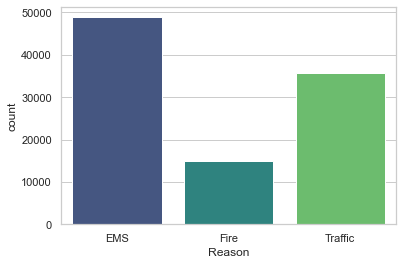

In [49]:
sns.countplot(x = 'Reason', data = df,palette="viridis")

In [12]:
type(df['timeStamp'][0])

str

In [13]:
df['timeStamp'] = df['timeStamp'].apply(lambda x: pd.to_datetime(x))

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day_of _week'] = df['timeStamp'].apply(lambda x: x.day)


In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['Day_of _week'] = df['Day_of _week'].apply(lambda x: x%7)

In [17]:
df['Day_of _week'] = df['Day_of _week'].map(dmap)

** Types of calls by Day of week **

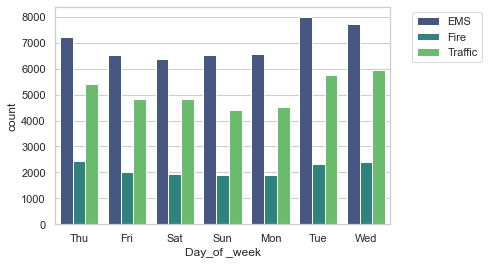

In [48]:
sns.set(style="whitegrid")
sns.countplot(x = 'Day_of _week',hue='Reason',data = df,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

** Calls observed per Month for different types of Calls:**

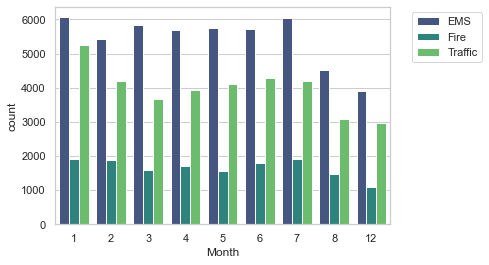

In [46]:
sns.set(style="whitegrid")
sns.countplot(x = 'Month',hue='Reason',data = df,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

** Filling in the missing month data **

In [20]:
byMonth = df.groupby(by="Month").count()

In [21]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of _week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month', ylabel='e'>

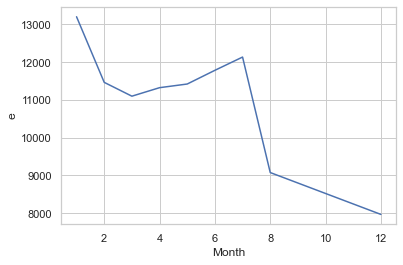

In [22]:
sns.lineplot(x=byMonth.index,y=byMonth['e'])

In [23]:
byMonth.reset_index(inplace=True)
byMonth.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of _week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Finding linear relation on the number of calls per month **

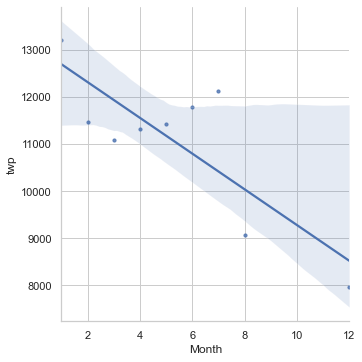

In [25]:
sns.lmplot(x="Month",y="twp",data=byMonth,scatter_kws={"s": 10})

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [43]:
df["Date"] = df["timeStamp"].apply(lambda x: x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of _week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


<AxesSubplot:xlabel='Date', ylabel='e'>

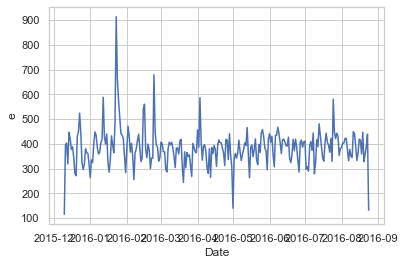

In [27]:
dt = df.groupby(by=df['Date']).count()
#dt.reset_index(inplace=True)
sns.lineplot(y=dt['e'],x=dt.index)

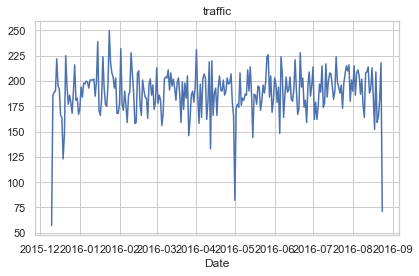

In [29]:
df[df['Reason'] == 'EMS'].groupby("Date").count()['e'].plot()
plt.title("traffic")
plt.tight_layout()

In [30]:
df1 = df.groupby(by=['Day_of _week','Hour']).count()['Reason'].unstack()

In [31]:
df1.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of _week,,,,,,,,,,,,,,,,,,,,,
Fri,293,200,201,165,170,206,287,554,748,769,...,798,876,852,882,787,664,591,480,454,313
Mon,308,235,259,186,170,208,334,450,606,718,...,770,770,839,877,773,652,519,479,413,322
Sat,249,228,189,180,176,184,303,483,661,667,...,798,848,893,838,766,719,565,576,425,343
Sun,283,259,193,212,193,210,324,506,654,652,...,821,776,804,824,714,652,566,483,430,329
Thu,325,260,216,223,245,262,391,679,769,820,...,843,877,930,932,892,745,739,627,523,402


** Creating a HeatMap to find at what Hour of the day do most calls happen per each Day of Week**

<AxesSubplot:xlabel='Hour', ylabel='Day_of _week'>

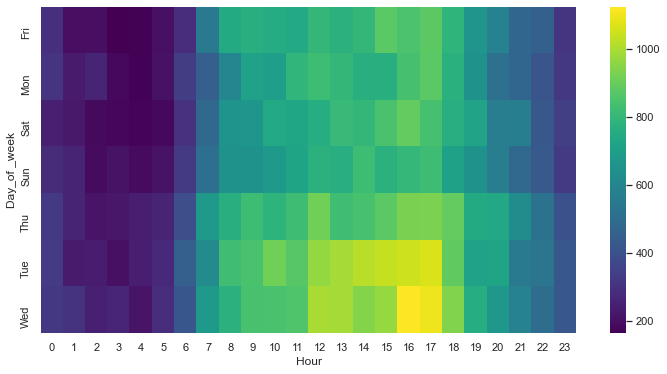

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(df1,cmap='viridis')

** Creating a clustermap using this DataFrame. **

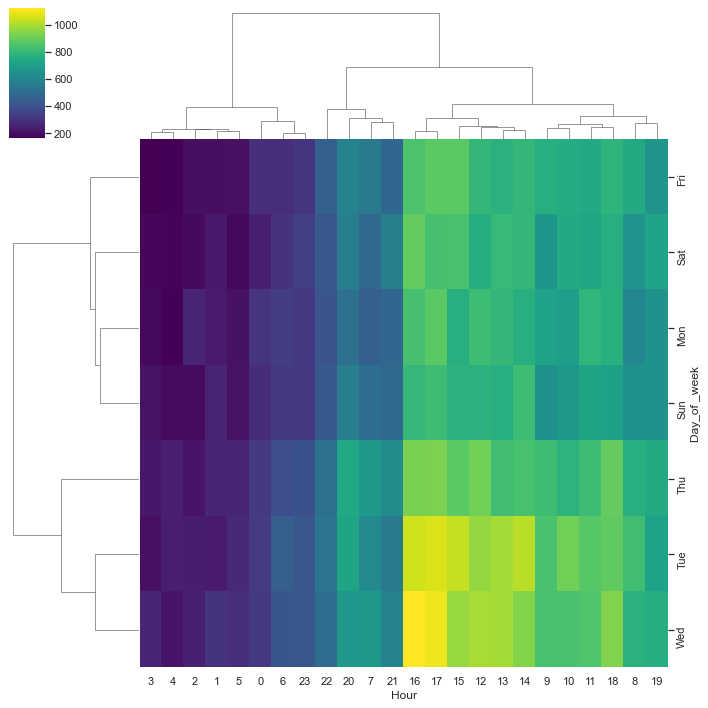

In [38]:
sns.clustermap(df1,cmap='viridis')

** Creating a HeatMap to find at what day in a week do most Calls happen with Month as the column. **

In [39]:
df2 = df.groupby(by=['Day_of _week','Month']).count()['e'].unstack()
df2

Month,1,2,3,4,5,6,7,8,12
Day_of _week,,,,,,,,,
Fri,1727,1596,1525,1598,1538,1388,1692,1230,1065
Mon,1584,1229,1535,1601,1444,1676,1646,1021,1257
Sat,1973,1581,1266,1430,1590,1333,1670,1310,978
Sun,1700,1441,1102,1517,1730,1617,1717,1099,907
Thu,1960,1903,1900,1488,1918,1649,1672,1295,1266
Tue,1970,1964,1884,1958,1424,2058,2045,1511,1234
Wed,2291,1753,1889,1734,1779,2065,1695,1612,1262


<AxesSubplot:xlabel='Month', ylabel='Day_of _week'>

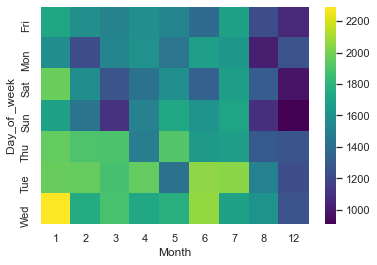

In [40]:
sns.heatmap(df2,cmap='viridis')

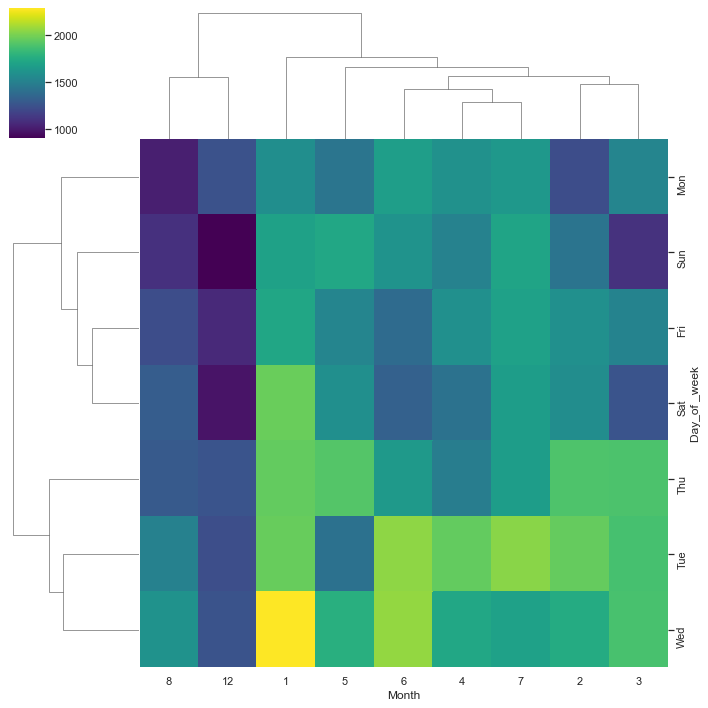

In [42]:
sns.clustermap(df2,cmap='viridis')

## Conclusion

Harnessing the power of Seaborn and Matplotlib we are able to perform Exploratory Data Analysis that gives us key insights about the Data. The project answers some very interesting and valuable questions such as:
1. What are the most common 911 calls?
2. When do they happen in terms of day of the week?
3. What hour of the day is most probable for a certain calls to happen?
4. Which month reported the highest number of 911 calls?

We observe that this data can be cross referenced with a certain incident that had happened in history that caused a sudden surge in the number of calls be it traffic, fire or EMS. This is certainly helpful for concerned agencies such as Traffic Control Board who can predict and regulate traffic given the trend observed from the visualizations.